In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv('train.csv')
print("Data loaded successfully! First 5 rows:")
display(df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].head())

Data loaded successfully! First 5 rows:


,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [9]:
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel trained successfully!")


Model trained successfully!


In [13]:
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print(f"Mean Squared Error: ${mean_squared_error(y_test, y_pred):,.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


Model Evaluation:
Mean Squared Error: $2,806,426,667.25
R² Score: 0.6341


In [17]:

new_house = pd.DataFrame([[2000, 3, 2]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
predicted_price = model.predict(new_house)[0]
print(f"Predicted price: ${predicted_price:,.2f}")

Predicted price: $240,377.51


In [19]:
import warnings
from sklearn.exceptions import DataConversionWarning

# For prediction
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    new_house = [[2000, 3, 2]]
    predicted_price = model.predict(new_house)[0]
print(f"Predicted price: ${predicted_price:,.2f}")

Predicted price: $240,377.51


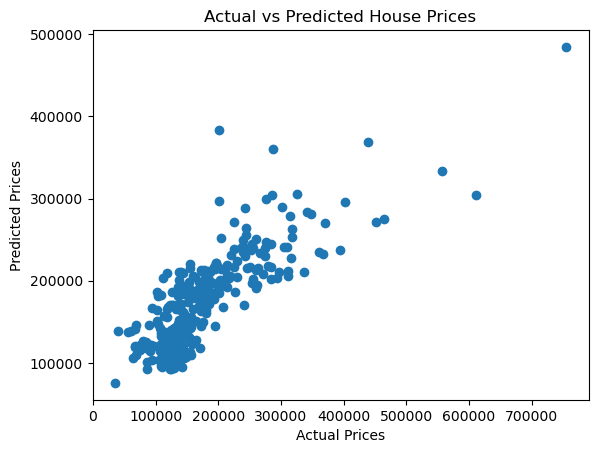

In [21]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

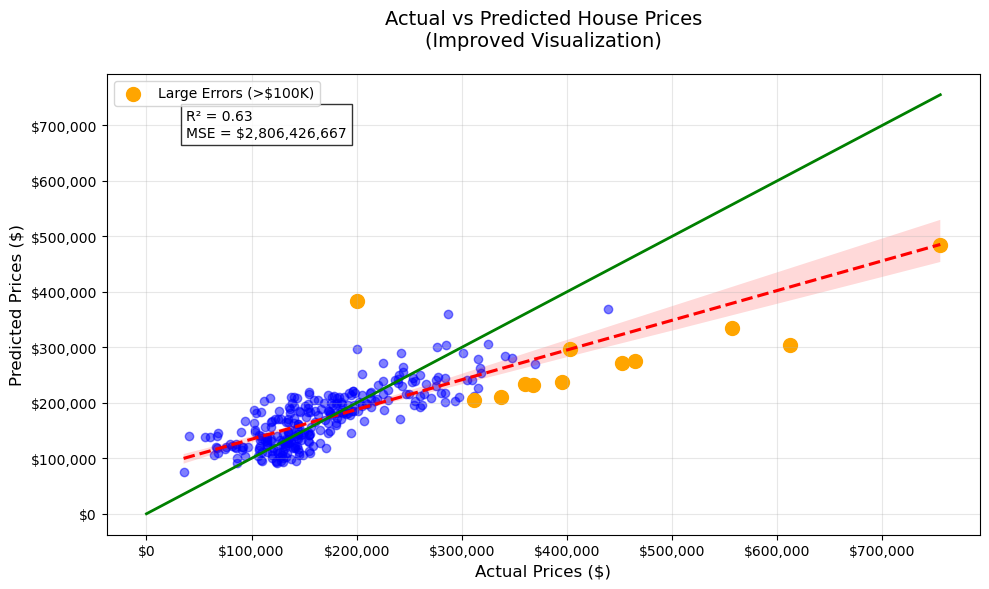

In [25]:

import numpy as np
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, 
            scatter_kws={'alpha':0.5, 'color':'blue'}, 
            line_kws={'color':'red', 'linestyle':'--'})

max_price = max(y_test.max(), y_pred.max())
plt.plot([0, max_price], [0, max_price], 
         color='green', linestyle='-', linewidth=2)

plt.title('Actual vs Predicted House Prices\n(Improved Visualization)', fontsize=14, pad=20)
plt.xlabel('Actual Prices ($)', fontsize=12)
plt.ylabel('Predicted Prices ($)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.text(0.05*max_price, 0.9*max_price, 
         f'R² = {r2_score(y_test, y_pred):.2f}\nMSE = ${mean_squared_error(y_test, y_pred):,.0f}', 
         bbox=dict(facecolor='white', alpha=0.8))

plt.gca().xaxis.set_major_formatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Optional: Highlight outliers
errors = np.abs(y_test - y_pred)
outliers = errors > 100000
plt.scatter(y_test[outliers], y_pred[outliers], 
            color='orange', s=100, label='Large Errors (>$100K)')
plt.legend()

plt.tight_layout()
plt.show()